Developer: Dr. Pankaj Kumar

pkumar.vt@gmail.com

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys

from helper import read_user_input

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

device: cuda


In [3]:
user_input = read_user_input()
batch_size = user_input['batch_size']
lr = user_input['lr']
step_2_save_output = user_input['step_2_save_output']
num_epochs = user_input['num_epochs']

In [4]:
def plot_data(images):
    plt.figure(figsize=(9, 2))
    plt.gray()
    images = images.detach().numpy()
    for i, item in enumerate(images[:9]):
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) 
        plt.imshow(item[0])
    plt.pause(0.1)

In [5]:
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Length of the MNIST dataset:", len(mnist_dataset))
#
data_loader = DataLoader(dataset = mnist_dataset, batch_size = batch_size, shuffle=False)

Length of the MNIST dataset: 60000


In [6]:
# to check the dataset values
# for images, labels in data_loader:
#     print(len(images), torch.min(images), torch.max(images), labels.unique())

In [7]:
class Autoencoder_Linear(nn.Module):
    def __init__(self, dim = 28*28):
        super(Autoencoder_Linear, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(dim, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 4),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, dim),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

In [8]:
model = Autoencoder_Linear().to(device)
criterian = nn.MSELoss()
optimizer = Adam(model.parameters(), lr = lr)

Plotting for epoch: 0, error: 0.06402761489152908


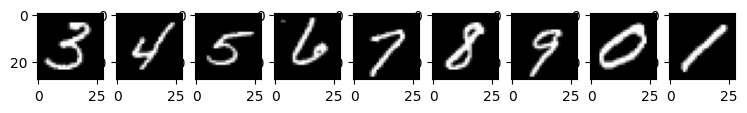

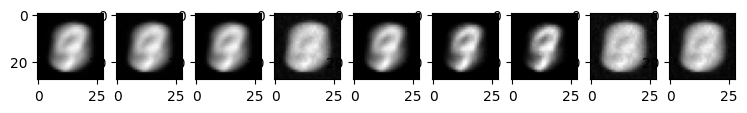

Plotting for epoch: 10, error: 0.0436374805867672


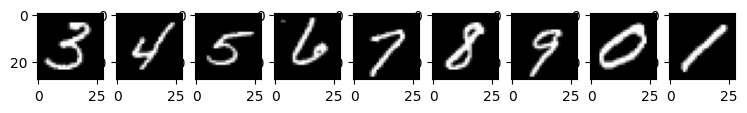

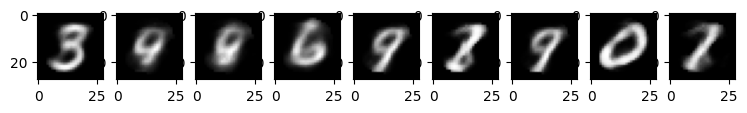

Plotting for epoch: 20, error: 0.03583519533276558


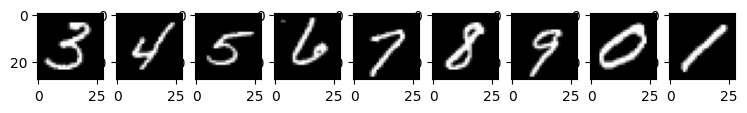

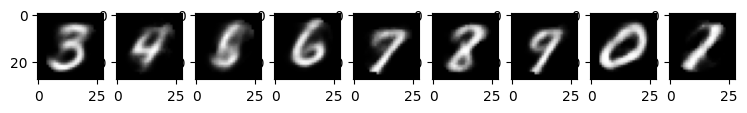

Plotting for epoch: 30, error: 0.031021032482385635


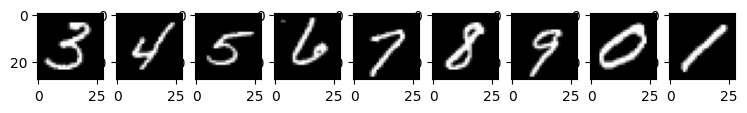

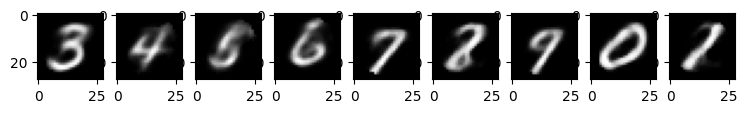

Plotting for epoch: 40, error: 0.029441677033901215


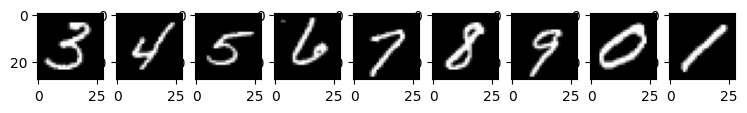

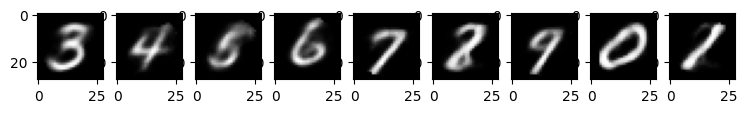

Plotting for epoch: 50, error: 0.028356963768601418


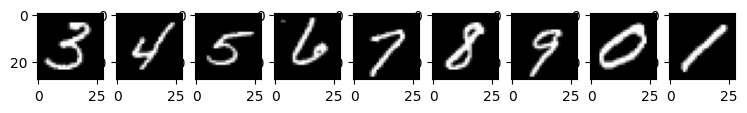

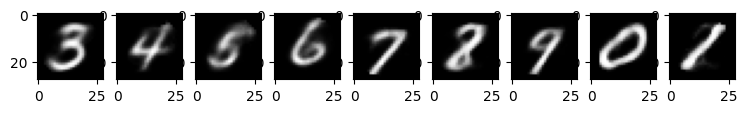

Plotting for epoch: 60, error: 0.02751062624156475


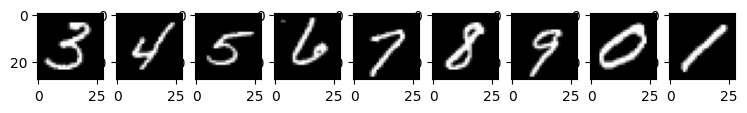

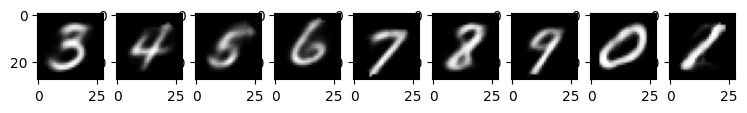

Plotting for epoch: 70, error: 0.026786748319864273


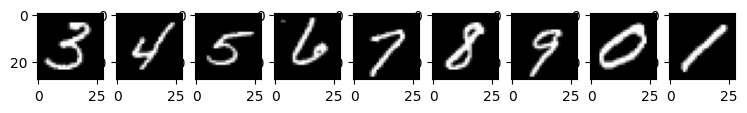

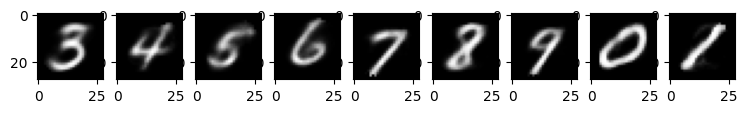

Plotting for epoch: 80, error: 0.02613934315741062


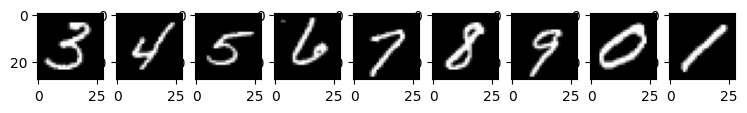

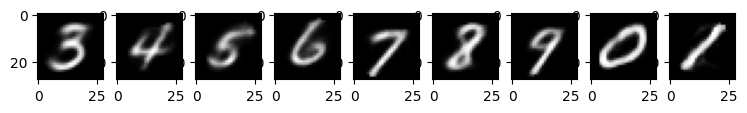

Plotting for epoch: 90, error: 0.025624817237257957


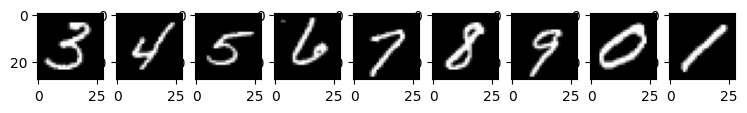

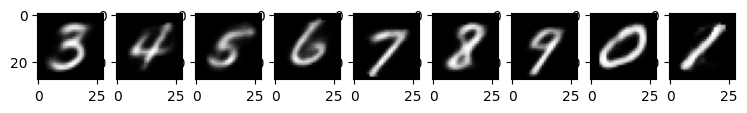

Plotting for epoch: 99, error: 0.02522899955511093


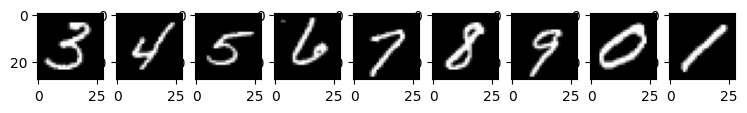

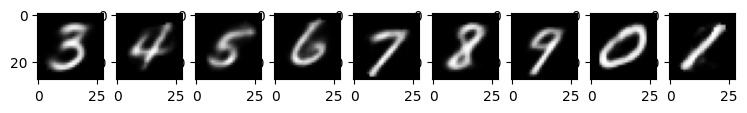

In [9]:
output_list = []
# for epoch in tqdm(range(num_epochs)):
for epoch in range(num_epochs):
    for images, labels in data_loader:
        images = images.reshape(-1, 28*28) .to(device)
        regenerated_images = model(images)
        loss = criterian(regenerated_images, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % step_2_save_output == 0 or epoch == num_epochs - 1:
        # output_list.append((epoch, loss.item(), images.cpu(), regenerated_images.cpu()))
        print(f"Plotting for epoch: {epoch}, error: {loss}")
        plot_data(images.cpu())
        plot_data(regenerated_images.cpu())
